In [90]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


## df= pd.read_csv("car.csv")

In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
# 1 name values are too big
# 2 company has wrong values 
# 3 year contains letters
# 4 Price has some string values 
# 5 kms_driven has all value in string

In [5]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='company', ylabel='count'>

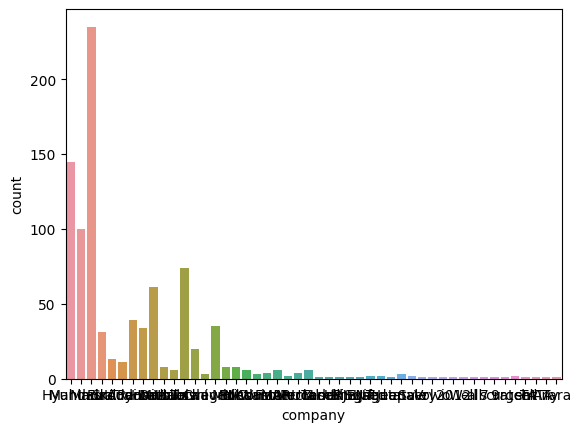

In [6]:
sns.countplot(df['company'])

In [7]:
df['company'].value_counts()

Maruti        235
Hyundai       145
Mahindra      100
Tata           74
Honda          61
Toyota         39
Chevrolet      35
Renault        34
Ford           31
Volkswagen     20
Skoda          13
Audi           11
Datsun          8
Mini            8
BMW             8
Nissan          6
Commercial      6
Mercedes        6
Mitsubishi      6
Force           4
Fiat            4
tata            3
Hindustan       3
I               3
MARUTI          2
urgent          2
Used            2
Jaguar          2
Sale            2
Well            1
Any             1
TATA            1
sell            1
scratch         1
9               1
7               1
all             1
Land            1
2012            1
i               1
Volvo           1
very            1
Jeep            1
Swift           1
URJENT          1
selling         1
Yamaha          1
Tara            1
Name: company, dtype: int64

In [8]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [9]:
df['kms_driven'].value_counts()

45,000 kms      30
35,000 kms      30
55,000 kms      25
50,000 kms      23
20,000 kms      22
                ..
1,03,553 kms     1
29,685 kms       1
30,874 kms       1
49,800 kms       1
1,66,000 kms     1
Name: kms_driven, Length: 258, dtype: int64

In [10]:
df.drop('name',axis = 1,inplace= True)

In [11]:
ndf =df[~df['company'].apply(lambda x:str(x).isnumeric())]

In [12]:
ndf = ndf[ndf['year'].apply(lambda x: str(x).isnumeric())]

In [13]:
ndf['Price'].apply(lambda x:str(x).strip())
# ndf['Price'].replace('Ask For Price',np.nan,inplace=True)

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
886         3,00,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 842, dtype: object

In [14]:
ndf['Price'].value_counts()

Ask For Price    23
2,50,000         16
3,50,000         12
4,00,000         11
1,80,000         11
                 ..
7,49,999          1
11,30,000         1
10,74,999         1
3,24,999          1
5,00,001          1
Name: Price, Length: 273, dtype: int64

In [15]:
ndf['kms_driven']=ndf['kms_driven'].apply(lambda x:str(x).split(' ')[0])

In [16]:
ndf = ndf[~ndf['kms_driven'].apply(lambda x:str(x).isnumeric())]

In [17]:
ndf['kms_driven'].value_counts()

45,000      30
35,000      30
55,000      25
50,000      23
20,000      22
            ..
1,03,553     1
49,800       1
81,876       1
6,020        1
44,005       1
Name: kms_driven, Length: 247, dtype: int64

In [18]:
def check(x):
    return str(x).replace(',','')

ndf['Price']= ndf['Price'].apply(check)
# ndf['Price'].astype(int,errors='ignore')

In [19]:
ndf['Price'] = pd.to_numeric(ndf['Price'], errors='coerce')

In [20]:
ndf['year'] = pd.to_numeric(ndf['year'] )

In [21]:
ndf['kms_driven']= ndf['kms_driven'].apply(check)
ndf['kms_driven'] = pd.to_numeric(ndf['kms_driven'], errors='coerce')

In [22]:
ndf.head()

,company,year,Price,kms_driven,fuel_type
0,Hyundai,2007,80000.0,45000.0,Petrol
2,Maruti,2018,NaN,22000.0,Petrol
3,Hyundai,2014,325000.0,28000.0,Petrol
4,Ford,2014,575000.0,36000.0,Diesel
5,Ford,2015,NaN,59000.0,Diesel


In [23]:
ndf.dropna(subset=['Price'],inplace= True)

In [24]:
ndf['kms_driven'].fillna(ndf['kms_driven'].mean(),inplace=True)
ndf['fuel_type'].fillna(method = 'ffill',inplace = True)

In [25]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 891
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company     802 non-null    object 
 1   year        802 non-null    int64  
 2   Price       802 non-null    float64
 3   kms_driven  802 non-null    float64
 4   fuel_type   802 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 37.6+ KB


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Price', ylabel='Density'>

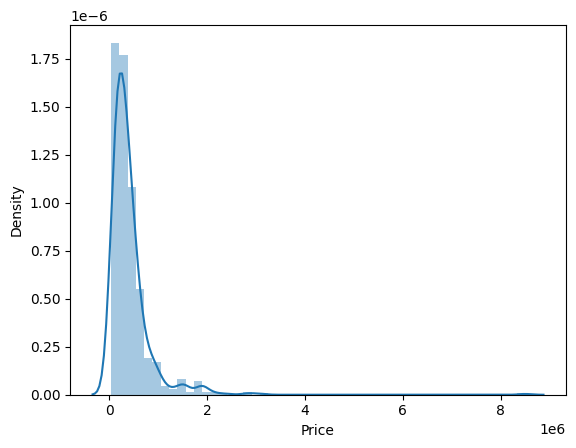

In [26]:
sns.distplot(ndf['Price'])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='kms_driven', ylabel='Density'>

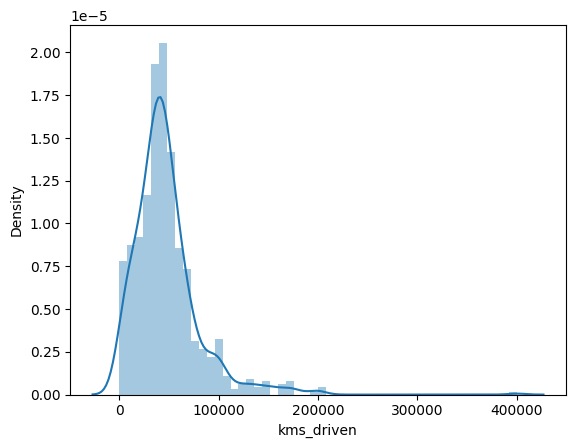

In [27]:
sns.distplot(ndf['kms_driven'])

In [28]:
model = DecisionTreeRegressor()
X = ndf.drop('Price',axis = 1)
y = ndf['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
X_train.skew()

C:\Users\HP\AppData\Local\Temp\ipykernel_5508\2416572290.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.skew()


year         -1.050150
kms_driven    3.083107
dtype: float64

In [29]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# One-hot encode the categorical columns
data_train = pd.DataFrame(encoder.fit_transform(X_train[['company', 'fuel_type']]))
data_test = pd.DataFrame(encoder.transform(X_test[['company', 'fuel_type']]))

# Set appropriate indices
data_train.index = X_train.index
data_test.index = X_test.index

# Set column names using get_feature_names_out
data_train.columns = encoder.get_feature_names_out(['company', 'fuel_type'])
data_test.columns = encoder.get_feature_names_out(['company', 'fuel_type'])

# Separate numeric columns
numeric_train_cols = X_train.drop(['company', 'fuel_type'], axis=1)
numeric_test_cols = X_test.drop(['company', 'fuel_type'], axis=1)

# Concatenate numeric and one-hot encoded columns
OH_X_train = pd.concat([numeric_train_cols, data_train], axis=1)
OH_X_test = pd.concat([numeric_test_cols, data_test], axis=1)

print(OH_X_train.head())
print(OH_X_test.head())


     year  kms_driven  company_Audi  company_BMW  company_Chevrolet  \
730  2003     51000.0           0.0          0.0                0.0   
352  2017     22000.0           0.0          0.0                0.0   
301  2009     46000.0           0.0          0.0                0.0   
22   2015     39000.0           0.0          0.0                0.0   
637  2011     52000.0           0.0          0.0                0.0   

     company_Datsun  company_Fiat  company_Force  company_Ford  \
730             0.0           0.0            0.0           0.0   
352             1.0           0.0            0.0           0.0   
301             0.0           0.0            0.0           0.0   
22              0.0           0.0            0.0           0.0   
637             0.0           0.0            0.0           0.0   

     company_Hindustan  ...  company_Nissan  company_Renault  company_Skoda  \
730                0.0  ...             0.0              0.0            0.0   
352               

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
OH_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 730 to 108
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                537 non-null    int64  
 1   kms_driven          537 non-null    float64
 2   company_Audi        537 non-null    float64
 3   company_BMW         537 non-null    float64
 4   company_Chevrolet   537 non-null    float64
 5   company_Datsun      537 non-null    float64
 6   company_Fiat        537 non-null    float64
 7   company_Force       537 non-null    float64
 8   company_Ford        537 non-null    float64
 9   company_Hindustan   537 non-null    float64
 10  company_Honda       537 non-null    float64
 11  company_Hyundai     537 non-null    float64
 12  company_Jaguar      537 non-null    float64
 13  company_Jeep        537 non-null    float64
 14  company_Mahindra    537 non-null    float64
 15  company_Maruti      537 non-null    float64
 16  compan

In [31]:
model.fit(OH_X_train,y_train)

DecisionTreeRegressor()

In [32]:
preds = model.predict(OH_X_test)
print(mean_absolute_error(y_test,preds))

182297.2289308176


In [67]:
lr = LinearRegression()

In [92]:
process_colms = ColumnTransformer([
    # ('imputer',SimpleImputer(strategy='most_frequent'),['company', 'fuel_type']),
    ('encoder',OneHotEncoder(handle_unknown='ignore'),['company', 'fuel_type']),
    ('transform',PowerTransformer(),['year', 'kms_driven']),
    ('scaler',StandardScaler(),['year', 'kms_driven'])
])

pipe=Pipeline([
    ('preprocess',process_colms),
    ('model',lr)
])

In [93]:
pipe.fit(X_train,y_train)
preds = pipe.predict(X_test)
print(r2_score(y_test,preds))

0.16827134371540176


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [89]:
cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\HP\Ap

0.49775588118195896

In [88]:
print(sklearn.metrics.get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [105]:
# max =[]
# for i in range(100):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=i)
#     pipe.fit(X_train,y_train)
#     pred=pipe.predict(X_test)
#     print(r2_score(y_test,pred))
#     max.append([r2_score(y_test,pred),i])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=78)
pipe.fit(X_train,y_train)
pred=pipe.predict(X_test)
print(r2_score(y_test,pred))


0.7895279961714191


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [112]:
pipe.predict(pd.DataFrame([['Maruti',2019,100,'Petrol']],columns=['company','year','kms_driven','fuel_type']))

array([507794.47307513])

In [116]:
X.to_csv("Cleaned_car.csv")

In [118]:
X.fuel_type.value_counts()

Petrol    423
Diesel    377
LPG         2
Name: fuel_type, dtype: int64

In [122]:
import pickle
pickle.dump(pipe,open("model.pk","wb"))